<a href="https://colab.research.google.com/github/Tdanso/Micro-Credential-Winter-22/blob/main/Diabetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #!pip install pydot
 #!pip install pydot-ng
 #!pip install graphviz
!pip install --upgrade scikit-learn==0.20.3

In [112]:
#as usually import the library 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# import train test split
from sklearn.model_selection import train_test_split
# import KNN
from sklearn.neighbors import KNeighborsClassifier
# lets create the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix


In [67]:
df = pd.read_csv("https://raw.githubusercontent.com/Tdanso/ML_Data/main/diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df.shape

(101766, 50)

In [10]:
df.describe

<bound method NDFrame.describe of         encounter_id  patient_nbr  ... diabetesMed readmitted
0            2278392      8222157  ...          No         NO
1             149190     55629189  ...         Yes        >30
2              64410     86047875  ...         Yes         NO
3             500364     82442376  ...         Yes         NO
4              16680     42519267  ...         Yes         NO
...              ...          ...  ...         ...        ...
101761     443847548    100162476  ...         Yes        >30
101762     443847782     74694222  ...         Yes         NO
101763     443854148     41088789  ...         Yes         NO
101764     443857166     31693671  ...         Yes         NO
101765     443867222    175429310  ...          No         NO

[101766 rows x 50 columns]>

In [8]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
df.isnull().sum()

In [62]:
df.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO


In [7]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [69]:
df.drop(['encounter_id','discharge_disposition_id', 'admission_source_id',
       'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change'], axis=1, inplace=True)
df.head()


,patient_nbr,gender,admission_type_id,time_in_hospital
0,8222157,Female,6,1
1,55629189,Female,1,3
2,86047875,Female,1,2
3,82442376,Male,1,2
4,42519267,Male,1,1


In [68]:
df.drop(['race', 'age', 'weight', 'insulin', 'diabetesMed',	'readmitted'], axis = 1, inplace = True)

In [79]:
scalar = StandardScaler()

In [80]:
# so we are dropping our predictor 'gender' from the df
scalar.fit(df.drop('gender', axis = 1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
# we scaled the features which contained rest of the columns w/ ggender
scaled_features = scalar.transform(df.drop('gender', axis = 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [82]:
# creating a new data frame without the gender
df_feature = pd.DataFrame(data = scaled_features,
                          columns = df.columns[:-1])

In [84]:
df_feature.head()

,patient_nbr,gender,admission_type_id
0,-1.191545,2.750800,-1.137649
1,0.033564,-0.708461,-0.467653
2,0.819654,-0.708461,-0.802651
3,0.726480,-0.708461,-0.802651
4,-0.305227,-0.708461,-1.137649


In [91]:
# splitting the data 30% testing, 70% training
X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                                    df['gender'],
                                                    test_size = 0.30)

In [92]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [93]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [94]:
predict = knn.predict(X_test)

In [95]:
predict

array(['Male', 'Female', 'Female', ..., 'Male', 'Female', 'Male'],
      dtype=object)

In [96]:
print(confusion_matrix(y_test, predict))

[[9468 6972    0]
 [7003 7084    1]
 [   2    0    0]]


Text(0.5, 1.0, 'Accuracy Score:0.5421552571241401')

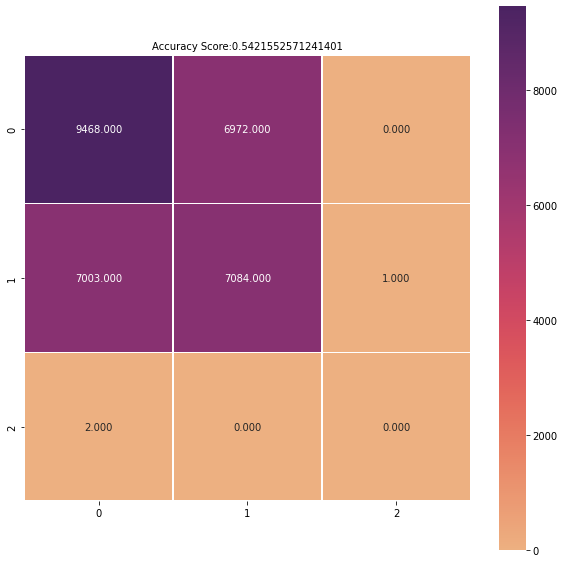

In [97]:
plt.figure(figsize = (10, 10))

sns.heatmap(confusion_matrix(y_test, predict),
            annot = True,
            fmt = '.3f',
            linewidths = .5,
            square = True,
            cmap="flare")
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')
all_sample_title = f'Accuracy Score:{knn.score(X_test, y_test)}'
plt.title(all_sample_title, size = 10)

In [98]:
print(classification_report(y_test, predict))

                 precision    recall  f1-score   support

         Female       0.57      0.58      0.58     16440
           Male       0.50      0.50      0.50     14088
Unknown/Invalid       0.00      0.00      0.00         2

      micro avg       0.54      0.54      0.54     30530
      macro avg       0.36      0.36      0.36     30530
   weighted avg       0.54      0.54      0.54     30530



In [99]:
knn5 = KNeighborsClassifier(n_neighbors = 4)

In [100]:
knn5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [101]:
predict2 = knn5.predict(X_test)

In [102]:
print(confusion_matrix(y_test, predict2))

[[12180  4260     0]
 [10025  4063     0]
 [    2     0     0]]


In [103]:
class_names = df.gender

Text(0.5, 1.0, 'Accuracy Score:0.5320340648542418')

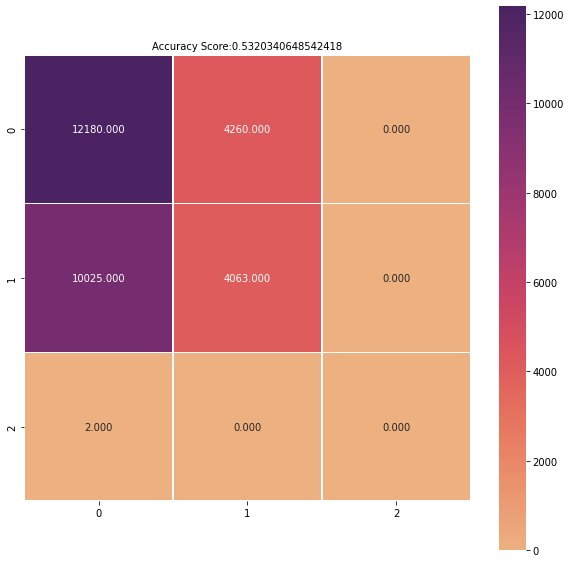

In [104]:
plt.figure(figsize = (10, 10))
sns.heatmap(confusion_matrix(y_test, predict2),
            annot = True,
            fmt = '.3f',
            linewidths = .5,
            square = True,
            cmap="flare")
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')
all_sample_title = f'Accuracy Score:{knn5.score(X_test, y_test)}'
plt.title(all_sample_title, size = 10)

In [105]:
print(classification_report(y_test, predict2))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

         Female       0.55      0.74      0.63     16440
           Male       0.49      0.29      0.36     14088
Unknown/Invalid       0.00      0.00      0.00         2

      micro avg       0.53      0.53      0.53     30530
      macro avg       0.35      0.34      0.33     30530
   weighted avg       0.52      0.53      0.51     30530



In [107]:
# this is a place holder for Accuracy
from sklearn import metrics
score = []

In [108]:
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test, y_pred))

print(score)

[0.5421552571241401, 0.5393711103832296, 0.5264657713724206, 0.5320340648542418, 0.5269570913855225, 0.530003275466754, 0.5245660006550934, 0.5308876514903373, 0.5245987553226334, 0.5349164755977727, 0.5238126433016704, 0.5328529315427448, 0.524729773992794, 0.5303963314772355, 0.5248607926629545, 0.531051424828038, 0.5292171634457911, 0.5317392728463806, 0.5286930887651491, 0.5301670488044546, 0.5249263019980347, 0.5308548968227973, 0.5261382246970193, 0.5304618408123157, 0.5248607926629545, 0.5299050114641336, 0.5273829020635441, 0.5302980674746152, 0.5279724860792663, 0.5293481821159515, 0.5264330167048804, 0.529741238126433, 0.5286275794300688, 0.5324598755322634, 0.529446446118572, 0.5321323288568621, 0.5275139207337045, 0.5324926301998034, 0.5279397314117261]


TypeError: ignored

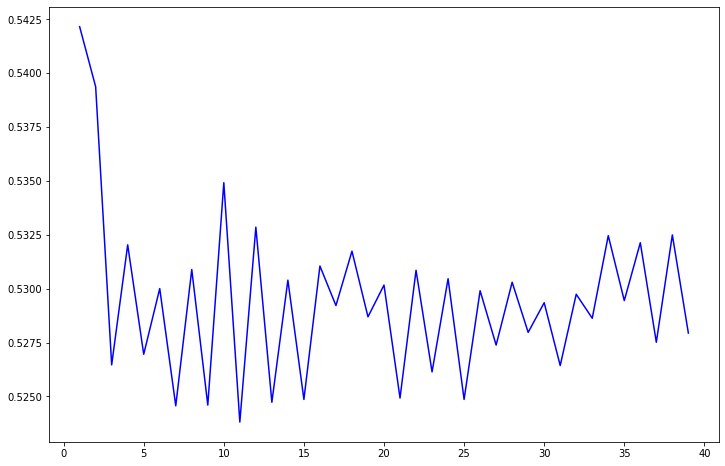

In [109]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40), score, color = 'blue')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [110]:
error_rate = []

for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

TypeError: ignored

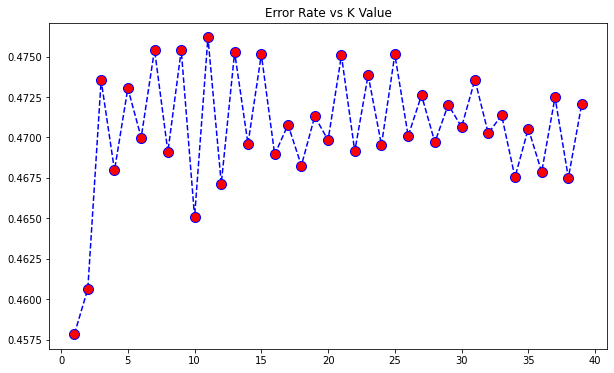

In [111]:
plt.figure(figsize = (10,6))
plt.plot(
         range(1,40),
         error_rate,
         color = 'blue',
         linestyle = 'dashed',
         marker = 'o',
         markerfacecolor = 'red',
         markersize = 10
         )
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")